In [ ]:
import pandas as pd
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
from folium import plugins

In [ ]:
import numpy as np

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
df = pd.read_csv('newfile.csv')

Understanding the dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248424 entries, 0 to 248423
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   financialyear          248424 non-null  object
 1   financialquarter       248424 non-null  int64 
 2   forcename              248424 non-null  object
 3   offencedescription     248424 non-null  object
 4   offencegroup           248424 non-null  object
 5   offencesubgroup        248424 non-null  object
 6   offencecode            248424 non-null  object
 7   numberofoffences       248424 non-null  int64 
 8   oldprcoffencegroup     248424 non-null  object
 9   oldoffencesubgroip     138556 non-null  object
 10  newonsoffencegroup     248424 non-null  object
 11  newonssuboffencegroup  248424 non-null  object
dtypes: int64(2), object(10)
memory usage: 22.7+ MB


In [ ]:
df['numberofoffences'].describe()

count    248424.000000
mean        213.745306
std         851.113370
min        -268.000000
25%           0.000000
50%           9.000000
75%          78.000000
max       29480.000000
Name: numberofoffences, dtype: float64

In [ ]:
df.isna().sum()

financialyear                 0
financialquarter              0
forcename                     0
offencedescription            0
offencegroup                  0
offencesubgroup               0
offencecode                   0
numberofoffences              0
oldprcoffencegroup            0
oldoffencesubgroip       109868
newonsoffencegroup            0
newonssuboffencegroup         0
dtype: int64

Preprocessing
Dropping unnecessary column

In [ ]:
df.drop(columns=['oldoffencesubgroip'], inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248424 entries, 0 to 248423
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   financialyear          248424 non-null  object
 1   financialquarter       248424 non-null  int64 
 2   forcename              248424 non-null  object
 3   offencedescription     248424 non-null  object
 4   offencegroup           248424 non-null  object
 5   offencesubgroup        248424 non-null  object
 6   offencecode            248424 non-null  object
 7   numberofoffences       248424 non-null  int64 
 8   oldprcoffencegroup     248424 non-null  object
 9   newonsoffencegroup     248424 non-null  object
 10  newonssuboffencegroup  248424 non-null  object
dtypes: int64(2), object(9)
memory usage: 20.8+ MB


Replacing negative values with zero

In [ ]:
# Specify the column for which you want to show only negative values
column_name = 'numberofoffences'

# Filtering only negative values from the specified column
negative_values_column = df[df[column_name] < 0]

In [ ]:
print(negative_values_column)

       financialyear  financialquarter                 forcename  \
378          2012/13                 1  British Transport Police   
664          2012/13                 1                  Cheshire   
6346         2012/13                 2         Avon and Somerset   
6372         2012/13                 2         Avon and Somerset   
6384         2012/13                 2         Avon and Somerset   
...              ...               ...                       ...   
154068       2018/19                 4           London, City of   
154085       2018/19                 4           London, City of   
154102       2018/19                 4           London, City of   
154121       2018/19                 4           London, City of   
154132       2018/19                 4           London, City of   

                                       offencedescription  \
378     Preserved other fraud and repealed fraud offen...   
664     Preserved other fraud and repealed fraud offen...   


In [ ]:
df = df[df['numberofoffences'] >= 0]

In [ ]:
df['numberofoffences'].describe()

count    247965.000000
mean        214.147852
std         851.849019
min           0.000000
25%           0.000000
50%           9.000000
75%          79.000000
max       29480.000000
Name: numberofoffences, dtype: float64

Confirming if negative values exist anymore

In [ ]:
negative_values_column = df[df['numberofoffences'] < 0]

In [ ]:
print(negative_values_column)

Empty DataFrame
Columns: [financialyear, financialquarter, forcename, offencedescription, offencegroup, offencesubgroup, offencecode, numberofoffences, oldprcoffencegroup, newonsoffencegroup, newonssuboffencegroup]
Index: []


In [ ]:
df.columns = df.columns.str.strip()

Exploratory Data Analysis

In [ ]:
group_df = df.groupby(['offencecode','forcename'])

In [ ]:
group_df.describe()

financialquarter                      \
                                                count      mean       std   
offencecode forcename                                                       
1           Avon and Somerset                    41.0  2.463415  1.142313   
            Bedfordshire                         40.0  2.450000  1.153590   
            British Transport Police             41.0  2.463415  1.142313   
            Cambridgeshire                       41.0  2.463415  1.142313   
            Cheshire                             41.0  2.463415  1.142313   
...                                               ...       ...       ...   
9B          Warwickshire                         45.0  2.466667  1.140175   
            West Mercia                          45.0  2.466667  1.140175   
            West Midlands                        45.0  2.466667  1.140175   
            West Yorkshire                       45.0  2.466667  1.140175   
            Wiltshire                            45.0  2.466667  1.140175   

                                                                \
                                      min  25%  50%   75%  max   
offencecode forcename                                            
1           Avon and Somerset         1.0  1.0  2.0  3.00  4.0   
            Bedfordshire              1.0  1.0  2.0  3.25  4.0   
            British Transport Police  1.0  1.0  2.0  3.00  4.0   
            Cambridgeshire            1.0  1.0  2.0  3.00  4.0   
            Cheshire                  1.0  1.0  2.0  3.00  4.0   
...                                   ...  ...  ...   ...  ...   
9B          Warwickshire              1.0  1.0  2.0  3.00  4.0   
            West Mercia               1.0  1.0  2.0  3.00  4.0   
            West Midlands             1.0  1.0  2.0  3.00  4.0   
            West Yorkshire            1.0  1.0  2.0  3.00  4.0   
            Wiltshire                 1.0  1.0  2.0  3.00  4.0   

                                     numberofoffences                          \
                                                count        mean         std   
offencecode forcename                                                           
1           Avon and Somerset                    41.0    2.853659    1.782708   
            Bedfordshire                         40.0    1.600000    1.373747   
            British Transport Police             41.0    0.390244    0.666260   
            Cambridgeshire                       41.0    1.682927    1.368193   
            Cheshire                             41.0    1.317073    2.042535   
...                                               ...         ...         ...   
9B          Warwickshire                         45.0   65.200000   27.013969   
            West Mercia                          45.0  124.466667   45.117322   
            West Midlands                        45.0  693.577778  294.136833   
            West Yorkshire                       45.0  609.733333  288.532132   
            Wiltshire                            45.0   65.977778   21.994306   

                                                                            
                                        min     25%    50%     75%     max  
offencecode forcename                                                       
1           Avon and Somerset           1.0    1.00    3.0    4.00     9.0  
            Bedfordshire                0.0    0.75    1.0    2.25     5.0  
            British Transport Police    0.0    0.00    0.0    1.00     2.0  
            Cambridgeshire              0.0    1.00    1.0    2.00     6.0  
            Cheshire                    0.0    0.00    1.0    1.00    12.0  
...                                     ...     ...    ...     ...     ...  
9B          Warwickshire               19.0   42.00   68.0   84.00   118.0  
            West Mercia                56.0   93.00  120.0  161.00   242.0  
            West Midlands             320.0  467.00

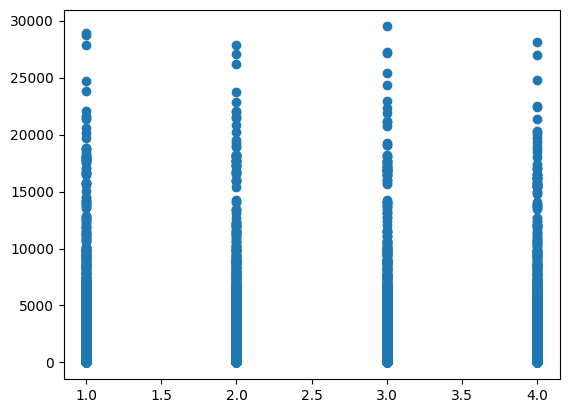

In [ ]:
y= df['numberofoffences']

x=df['financialquarter']

plt.scatter(x,y)

Data Slicing

In [ ]:
covid_condition = df[(df['financialyear'] == '2019/20') | (df['financialyear'] == '2020/21')]

In [ ]:
covid_condition.describe

<bound method NDFrame.describe of        financialyear  financialquarter          forcename  \
156338       2019/20                 1  Avon and Somerset   
156339       2019/20                 1  Avon and Somerset   
156340       2019/20                 1  Avon and Somerset   
156341       2019/20                 1  Avon and Somerset   
156342       2019/20                 1  Avon and Somerset   
...              ...               ...                ...   
200159       2020/21                 4          Wiltshire   
200160       2020/21                 4          Wiltshire   
200161       2020/21                 4          Wiltshire   
200162       2020/21                 4          Wiltshire   
200163       2020/21                 4          Wiltshire   

                                       offencedescription  \
156338                     Absconding from lawful custody   
156339      Abuse of children through sexual exploitation   
156340      Abuse of position of trust of a sexual

In [ ]:
new_cc= df[df['numberofoffences'] >= 5000]
print(new_cc)

       financialyear  financialquarter            forcename  \
3588         2012/13                 1  Metropolitan Police   
3599         2012/13                 1  Metropolitan Police   
3600         2012/13                 1  Metropolitan Police   
3613         2012/13                 1  Metropolitan Police   
3654         2012/13                 1  Metropolitan Police   
...              ...               ...                  ...   
248391       2023/24                 1        West Midlands   
248400       2023/24                 1       West Yorkshire   
248401       2023/24                 1       West Yorkshire   
248402       2023/24                 1       West Yorkshire   
248403       2023/24                 1       West Yorkshire   

                                  offencedescription  \
3588                          Assault without injury   
3599    Burglary in a building other than a dwelling   
3600                          Burglary in a dwelling   
3613               

One Hot encoding

In [ ]:
df_encoded = pd.get_dummies(new_cc, columns=['offencecode'], prefix='offencecode')

In [ ]:
df_encoded = pd.get_dummies(new_cc, columns=['financialyear'], prefix='financialyear')

In [ ]:
df_encoded = pd.get_dummies(new_cc, columns=['forcename'], prefix='forcename')

Feature Selection

In [ ]:
X = new_cc[['financialyear', 'offencecode', 'forcename']]
Y= new_cc['numberofoffences']

In [ ]:
X = pd.get_dummies(data=X, drop_first=True)

Splitting Data

In [ ]:
X_train, X_test,Y_train, Y_test = train_test_split(X,Y, train_size = 0.8, random_state=42)

In [ ]:
X_train.head()

,financialyear_2013/14,financialyear_2014/15,financialyear_2015/16,financialyear_2016/17,financialyear_2017/18,financialyear_2018/19,financialyear_2019/20,financialyear_2020/21,financialyear_2021/22,financialyear_2022/23,...,forcename_Essex,forcename_Greater Manchester,forcename_Hampshire,forcename_Kent,forcename_Lancashire,forcename_Merseyside,forcename_Metropolitan Police,forcename_Thames Valley,forcename_West Midlands,forcename_West Yorkshire
154347,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
156128,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
234060,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
109204,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
213597,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
X_train.shape

(912, 37)

Fitting the data into model

In [ ]:
reg= linear_model.LinearRegression()

In [ ]:
model = reg.fit(X_train, Y_train)

In [ ]:
predict_Y = model.predict(X_test)

In [ ]:
predict_Y

array([ 8385.82697867,  9325.38562141, 12086.41991323, 17228.93491479,
        6084.4253163 ,  5727.31469802,  6875.12091177,  8363.41330896,
        6787.24950618,  6374.61667963,  2591.36205016, 13303.31400444,
       15953.2983905 ,  1170.75143196,  8445.9112831 , 12280.49580389,
        5321.04328166,  8120.34494224,  9009.51790339, 14638.06621777,
        9630.51141784,  8150.75743606,  8371.47653546,  9455.05756137,
       18771.51277219,  8363.41330896,  8735.70547464,  6411.97530325,
        7420.14614502,  5237.98250979,  5470.36055619,  8456.42282379,
        2433.2510229 ,  3197.37938035,  7397.84289148,  6689.77474567,
       20204.26072788,  4281.65682409, 12441.31542188,  7128.08371971,
        6084.4253163 ,  7495.86961431, 21519.4929006 , 18771.51277219,
        8561.0324981 ,  9509.64919728, 13303.31400444,  7925.10037856,
       12360.79573893,  6346.56195032,  6585.85196702,  6815.03660734,
        6653.25440607,  8561.0324981 ,  6787.24950618,  9526.40327226,
      

In [ ]:
model.score(X_test, Y_test)

0.8053440768492776

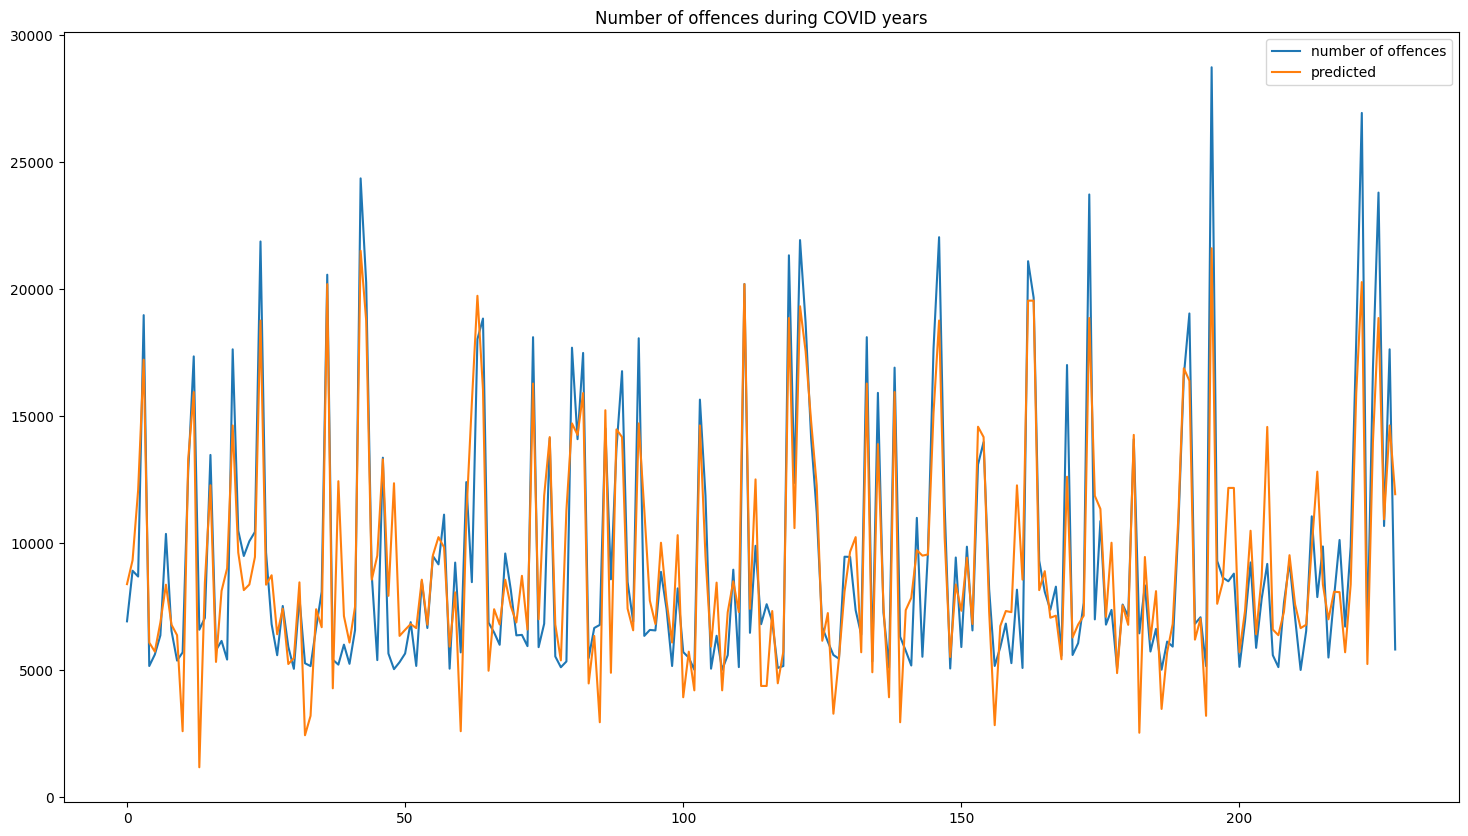

In [ ]:
plt.figure(figsize=(18,10))
x_axis=range(len(Y_test))
plt.plot(x_axis, Y_test, label='number of offences')
plt.plot(x_axis, predict_Y, label='predicted')
plt.title('Number of offences during COVID years')
plt.legend()
plt.show()

Metrics

In [ ]:
from sklearn import metrics

print("Mean squared error", metrics.mean_squared_error(Y_test, predict_Y))
print('Mean absolute error', metrics.mean_absolute_error(Y_test, predict_Y))
print('Root mean squared error', np.sqrt(metrics.mean_squared_error(Y_test, predict_Y)))

Mean squared error 4920441.051382354
Mean absolute error 1611.363986490939
Root mean squared error 2218.2067197135516


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
print("Coefficient of determination:", r2_score(Y_test, predict_Y))

Coefficient of determination: 0.8053440768492776


In [ ]:
##LOGISTIC REGRESSION
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder


In [ ]:
condition_1 = df['financialquarter'] == 1
condition_2 = df['financialquarter'] == 2
condition_3 = df['financialquarter'] == 3
condition_4 = df['financialquarter'] == 4

# Create new DataFrames for each slice
df_finquart1 = df[condition_1].copy()
df_finquart2 = df[condition_2].copy()
df_finquart3 = df[condition_3].copy()
df_finquart4 = df[condition_4].copy()

In [ ]:
df1_encoded = pd.get_dummies(new_cc, columns=['financialyear'], prefix='financialyear')
df1 = df_finquart1 ['numberofoffences']
df2 = df_finquart2 ['numberofoffences']
df3 = df_finquart3 ['numberofoffences']
df4 = df_finquart4 ['numberofoffences']

In [ ]:
df_encoded= pd.get_dummies(covid_condition, columns=['offencecode'], prefix='offencecode')

NameError: name 'pd' is not defined

In [ ]:
df_encoded= pd.get_dummies(covid_condition, columns=['financialyear'], prefix='financialyear')

In [ ]:
df_encoded = pd.get_dummies(covid_condition, columns=['forcename'], prefix='forcename')

In [ ]:
X_LogReg = covid_condition[['financialyear', 'offencecode', 'forcename']]
y_LogReg= covid_condition['numberofoffences']

In [ ]:
X_LogReg = pd.get_dummies(data=X_LogReg, drop_first=True)

In [ ]:
X_train_LogReg, X_test_LogReg, y_train_LogReg, y_test_LogReg = train_test_split(X_LogReg, y_LogReg, test_size=0.2, random_state=0)

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train_LogReg, y_train_LogReg)

In [ ]:
y_pred_LogReg = logreg.predict(X_test_LogReg)

NameError: name 'logreg' is not defined

In [ ]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test_LogReg, y_test_LogReg)))

Accuracy of logistic regression classifier on test set: 0.00
